In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. 生成高维多特征数据：3 类，每类 50 个样本，特征维度为 5
np.random.seed(42)
n = 50
d = 5  # 特征维度
means = [np.random.rand(d) * 5 for _ in range(3)]
cov = np.eye(d)  # 使用单位协方差矩阵

In [ ]:
X = np.vstack([np.random.multivariate_normal(mean, cov, n) for mean in means]) # 生成数据集
y = np.hstack([i * np.ones(n) for i in range(len(means))]).astype(int) # 生成标签

In [ ]:
# 2. 计算类均值和整体均值
class_labels = np.unique(y) # 获取所有类别
means_vectors = [X[y == i].mean(axis=0) for i in class_labels] # 计算每个类的均值
overall_mean = X.mean(axis=0) # 计算整体均值

In [ ]:
# 3. 计算类内散度矩阵 S_w
S_w = np.zeros((d, d)) # 初始化类内散度矩阵
# 遍历每个类，计算类内散度矩阵
for i, mean_vec in zip(class_labels, means_vectors): 
    class_scatter = (X[y == i] - mean_vec).T @ (X[y == i] - mean_vec)
    S_w += class_scatter

In [6]:
# 4. 计算类间散度矩阵 S_b
S_b = np.zeros((d, d))
for i, mean_vec in zip(class_labels, means_vectors):
    n_i = X[y == i].shape[0]
    mean_diff = (mean_vec - overall_mean).reshape(d, 1)
    S_b += n_i * (mean_diff).dot(mean_diff.T)

In [7]:
# 5. 求解广义特征值问题：S_w^{-1} S_b
eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_w).dot(S_b))
idx_sorted = np.argsort(np.abs(eig_vals))[::-1]
eig_vecs = eig_vecs[:, idx_sorted]

In [8]:
# 6. 选取前两个特征向量作为投影矩阵
W = eig_vecs[:, :2]

In [9]:
# 7. 投影
X_lda = X.dot(W)

In [ ]:
# 8. 最近中心分类
centroids = np.array([X_lda[y == i].mean(axis=0) for i in class_labels]) # 计算每个类别的质心
y_pred = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X_lda]) # 计算每个样本的预测类别
accuracy = np.mean(y_pred == y) # 计算分类准确率

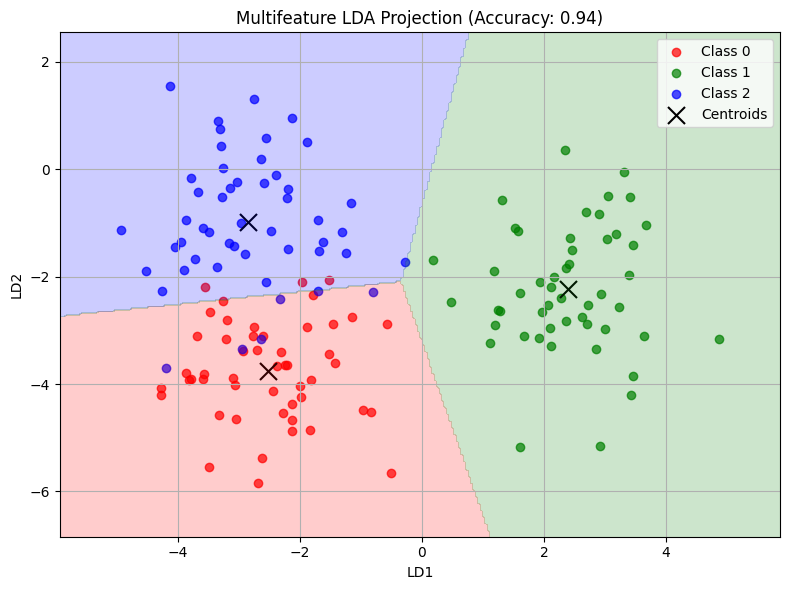

In [12]:
# 9. 可视化
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i, color in zip(class_labels, colors):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=f'Class {i}', alpha=0.7, c=color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, c='k', label='Centroids')

# 决策边界
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in grid])
grid_pred = grid_pred.reshape(xx.shape)

plt.contourf(xx, yy, grid_pred, alpha=0.2, levels=np.arange(len(class_labels) + 1) - 0.5, colors=colors)
plt.title(f'Multifeature LDA Projection (Accuracy: {accuracy:.2f})')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()